<a href="https://colab.research.google.com/github/2series/test/blob/main/test_copy2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

file_id = '12nRGXBL6u38sCET_x1OmLW6Hlthob-e_' # app_data_final.csv
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
# The shareable link
link = 'https://drive.google.com/open?id=12nRGXBL6u38sCET_x1OmLW6Hlthob-e_'

In [4]:
# Verify everything after '='
fluff, id = link.split('=')
print (id) 

12nRGXBL6u38sCET_x1OmLW6Hlthob-e_


In [5]:
# Libraries are imported at the start of nb
!pip install scikit-plot

In [6]:
# Import libraries and prepare the data
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True, precision=3)
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
from pandas.plotting import scatter_matrix

from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import svm
plt.style.use('ggplot')

In [7]:
# Stored dataset in a Pandas Dataframe
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('app_data_final.csv')  
df = pd.read_csv('app_data_final.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,NaN,1,0,Laborers,1.0,2,10,Business Entity Type 3,0.083037,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,1,0,Core staff,2.0,1,11,School,0.311267,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,1,0,Laborers,1.0,2,9,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,NaN,0,0,Laborers,2.0,2,17,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,NaN,0,0,Core staff,1.0,2,11,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.shape

(307511, 34)

In [9]:
df.columns.unique()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [10]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,104582.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,12.061091,0.281066,0.056720,2.152665,2.052463,12.063419,0.502130,5.143927e-01,0.510853,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.944812,0.449521,0.231307,0.910682,0.509034,3.265832,0.211062,1.910602e-01,0.194844,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.014568,8.170000e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,5.000000,0.000000,0.000000,2.000000,2.000000,10.000000,0.334007,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,9.000000,0.000000,0.000000,2.000000,2.000000,12.000000,0.505998,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,15.000000,1.000000,0.000000,3.000000,2.000000,14.000000,0.675053,6.636171e-01,0.669057,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,91.000000,1.000000,1.000000,20.000000,3.000000,23.000000,0.962693,8.549997e-01,0.896010,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
# Preview data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

## Data Cleaning

In [12]:
# Preview for missing values
df.isnull().any()

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
FLAG_OWN_REALTY               False
CNT_CHILDREN                  False
AMT_INCOME_TOTAL              False
AMT_CREDIT                    False
AMT_ANNUITY                    True
AMT_GOODS_PRICE                True
NAME_TYPE_SUITE                True
NAME_INCOME_TYPE              False
NAME_EDUCATION_TYPE           False
NAME_FAMILY_STATUS            False
NAME_HOUSING_TYPE             False
REGION_POPULATION_RELATIVE    False
OWN_CAR_AGE                    True
FLAG_PHONE                    False
FLAG_EMAIL                    False
OCCUPATION_TYPE                True
CNT_FAM_MEMBERS                True
REGION_RATING_CLIENT          False
HOUR_APPR_PROCESS_START       False
ORGANIZATION_TYPE             False
EXT_SOURCE_1                   True
EXT_SOURCE_2                   True
EXT_SOURCE_3                

In [13]:
# Quantify number of missing values
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
OWN_CAR_AGE                   202929
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
E

In [14]:
# Preview percentages of missing values
missing_values = ((df.isna().sum()) / len(df.index)).sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print(missing_values*100)

OWN_CAR_AGE                   65.990810
EXT_SOURCE_1                  56.381073
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
dtype: float64


In [15]:
# Drop columns where NaN is more than 30%
df.drop(missing_values[missing_values > 0.3].index, axis=1, inplace=True)

In [16]:
# Drop rows where NaN is more than 30
df.dropna(axis=0, thresh=30, inplace=True)

In [17]:
df.shape

(265579, 31)

In [18]:
# Quantify number of missing values
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      11
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                 868
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
HOUR_APPR_PROCESS_START           0
ORGANIZATION_TYPE                 0
EXT_SOURCE_2                    430
EXT_SOURCE_3                  19243
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK  

In [19]:
# Fill missing values with zero
df.fillna(0, inplace=True)

In [20]:
# Segregating numeric and categorical variable names
numeric_var_names = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
catgorical_var_names = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]

In [21]:
# Preview Categorical variables
catgorical_var_names

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE']

In [22]:
# Preview unique values
unique_val = df.apply(lambda x: len(pd.unique(x)), axis=0).sort_values(ascending=False)
unique_val

SK_ID_CURR                    265579
EXT_SOURCE_2                  111938
AMT_ANNUITY                    13193
AMT_CREDIT                      5265
AMT_INCOME_TOTAL                2182
AMT_GOODS_PRICE                  840
EXT_SOURCE_3                     815
REGION_POPULATION_RELATIVE        81
ORGANIZATION_TYPE                 58
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
CNT_FAM_MEMBERS                   17
CNT_CHILDREN                      15
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
NAME_INCOME_TYPE                   8
NAME_TYPE_SUITE                    8
NAME_HOUSING_TYPE                  6
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 5
CODE_GENDER                        3
REGION_RATING_CLIENT               3
FLAG_PHONE                         2
FLAG_EMAIL                         2
F

In [23]:
# Lets sample the count for variables having unique values
def column_analyse(x, df=df): 
    print(df[x].value_counts(), '\n', df[x].value_counts()/len(df[x]))

column_analyse('TARGET') 
column_analyse('NAME_CONTRACT_TYPE')
column_analyse('FLAG_EMAIL')
column_analyse('REGION_RATING_CLIENT')

0    245070
1     20509
Name: TARGET, dtype: int64 
 0    0.922776
1    0.077224
Name: TARGET, dtype: float64
Cash loans         240825
Revolving loans     24754
Name: NAME_CONTRACT_TYPE, dtype: int64 
 Cash loans         0.906792
Revolving loans    0.093208
Name: NAME_CONTRACT_TYPE, dtype: float64
0    250240
1     15339
Name: FLAG_EMAIL, dtype: int64 
 0    0.942243
1    0.057757
Name: FLAG_EMAIL, dtype: float64
2    197021
3     41366
1     27192
Name: REGION_RATING_CLIENT, dtype: int64 
 2    0.741855
3    0.155758
1    0.102388
Name: REGION_RATING_CLIENT, dtype: float64


### Observation

* We will remove SK_ID_CURR as it is 100% unique
* TARGET, NAME_CONTRACT_TYPE and FLAG_EMAIL are highly imbalanced, more than 90%
* EXT_SOURCE_2, EXT_SOURCE_3, ORGANIZATION_TYPE are too detailed for analysis



In [24]:
delete_cols = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_EMAIL', 
               'FLAG_PHONE', 'EXT_SOURCE_2', 
               'EXT_SOURCE_3', 'ORGANIZATION_TYPE']

df.drop(delete_cols, axis=1, inplace=True)

# Visualizations

## Univariate Plotting

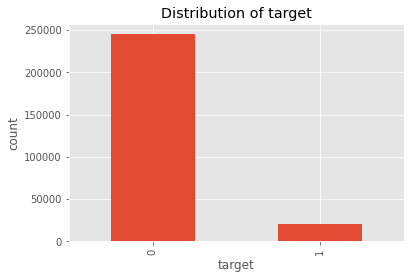

In [25]:
df['TARGET'].value_counts().plot.bar()
plt.xlabel('target')
plt.ylabel('count')
plt.title('Distribution of target')
plt.show()

We have an imbalanced dataset

O represents non-default and 1 represents default

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


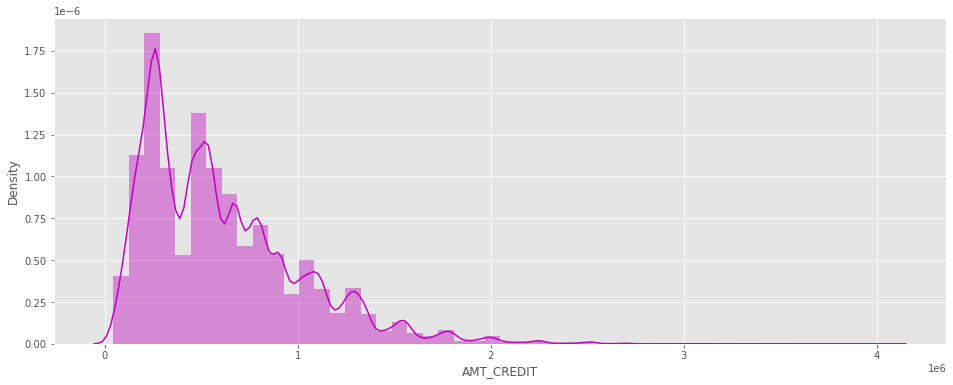

In [26]:
plt.figure(figsize=(16, 6))
sns.distplot(df['AMT_CREDIT'], color='m')

We see a right skewed variable

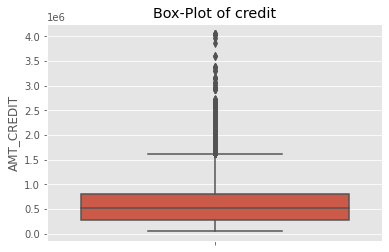

In [27]:
sns.boxplot(y='AMT_CREDIT', data=df)
plt.title('Box-Plot of credit')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


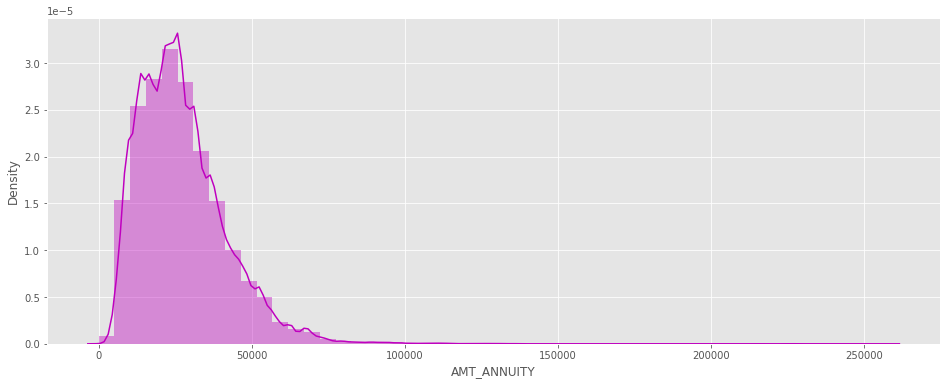

In [28]:
plt.figure(figsize=(16, 6))
sns.distplot(df['AMT_ANNUITY'], color='m')

We see a right skewed variable

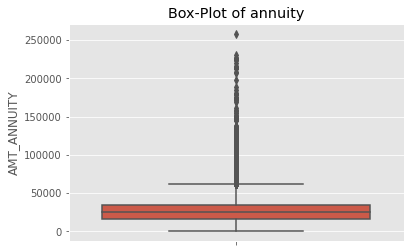

In [29]:
sns.boxplot(y='AMT_ANNUITY', data=df)
plt.title('Box-Plot of annuity')
plt.show()

In [30]:
# Suppress scientific notation
#pd.options.display.float_format = '{:.2f}'.format

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


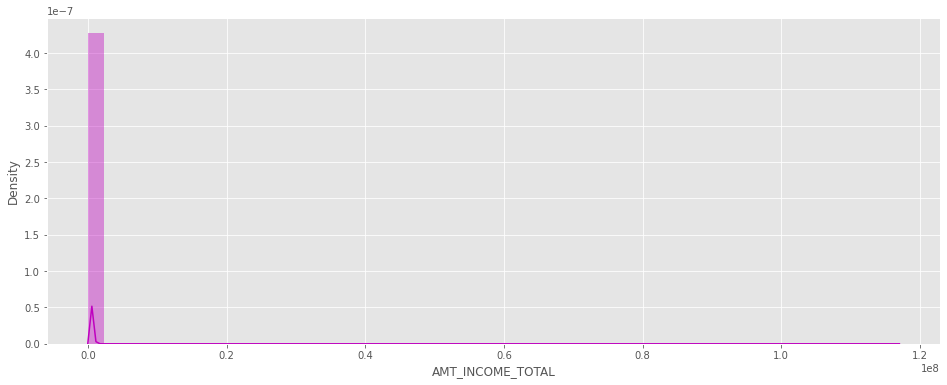

In [31]:
plt.figure(figsize=(16, 6))
sns.distplot(df['AMT_INCOME_TOTAL'], color='m')

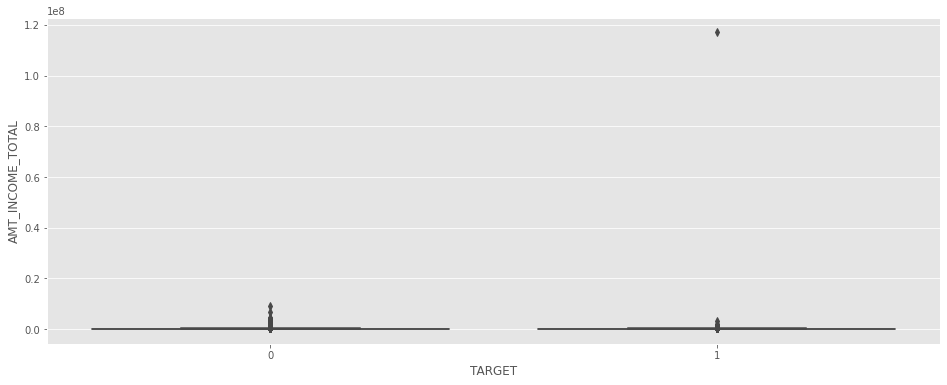

In [32]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='TARGET',
            y='AMT_INCOME_TOTAL',
            data=df)

We see a right skewed variable



In [33]:
def plot_var(col_name, title, continuous, df, x1limit=False, x2limit=False, x1l=0, x1u=0, x2l=0, x2u=0):
    """
    Plot a variable against the response variable TARGET
    - col_name is the variable name in the dataframe
    - title is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    - df is the pandas dataframe containing our dataset
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 3), dpi=90)

    # Plot without TARGET variable
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()),
                      color='#4f81bd', saturation=1, ax=ax1)
    if x1limit:
        ax1.set_xlim([x1l, x1u])
    ax1.set_xlabel(title)
    ax1.set_ylabel('Frequency')
    ax1.set_title(title)

    # Plot with TARGET variable
    if continuous:
        sns.boxplot(x=col_name, y='TARGET', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(title + ' by TARGET')
    else:
        charge_off_rates = df.groupby(col_name)['TARGET'].value_counts(normalize=True).loc[:, 'Default']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#4f81bd', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Default')
        ax2.set_title('Default Rate by ' + title)
    if x2limit:
        ax2.set_xlim([x2l, x2u])
    ax2.set_xlabel(title)

    plt.tight_layout()

           count          mean           std  ...      50%      75%       max
TARGET                                        ...                            
0       245070.0  27238.984851  14548.685727  ...  24939.0  34911.0  258025.5
1        20509.0  26551.247599  12300.122581  ...  25407.0  33025.5  149211.0

[2 rows x 8 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


           count       mean       std  ...        50%        75%        max
TARGET                                 ...                                 
0       245070.0  10.072092  0.550048  ...  10.124228  10.460586  12.460818
1        20509.0  10.074667  0.492927  ...  10.142819  10.405066  11.913123

[2 rows x 8 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


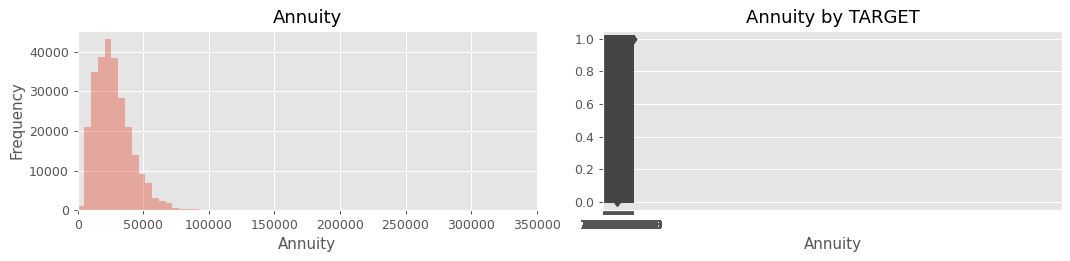

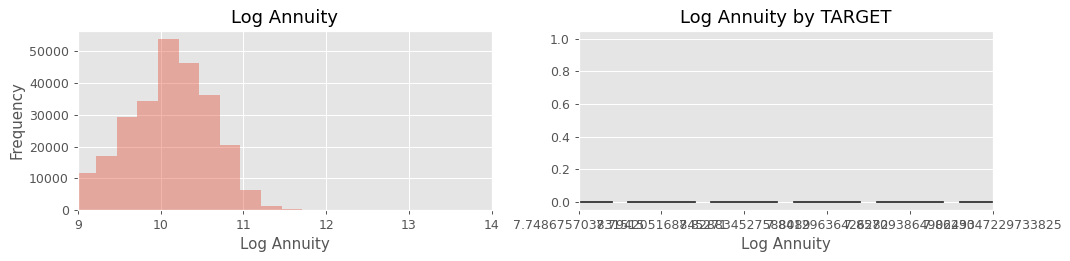

In [34]:
print(df.groupby('TARGET')['AMT_ANNUITY'].describe())
plot_var('AMT_ANNUITY', 'Annuity', continuous=True, df=df,
         x1limit=True, x2limit=True, x1l=-1, x1u=350000, x2l=-1, x2u=200000)

# Because the plot is right skewed we take a log transform of the income total
df['log_annuity'] = df['AMT_ANNUITY'].apply(lambda x: np.log(x + 1))
df.drop('AMT_ANNUITY', axis=1, inplace=True)
print(df.groupby('TARGET')['log_annuity'].describe())
plot_var('log_annuity', 'Log Annuity', continuous=True, df=df,
         x1limit=True, x2limit=True, x1l=9, x1u=14, x2l=9, x2u=14)

           count           mean            std  ...       50%       75%          max
TARGET                                          ...                                 
0       245070.0  171421.214571  102927.474330  ...  157500.0  202500.0    9000000.0
1        20509.0  170088.651373  820633.535634  ...  144000.0  202500.0  117000000.0

[2 rows x 8 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


           count       mean       std  ...        50%      75%        max
TARGET                                 ...                               
0       245070.0  11.927765  0.488111  ...  11.967187  12.2185  16.012735
1        20509.0  11.902034  0.459689  ...  11.877576  12.2185  18.577685

[2 rows x 8 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


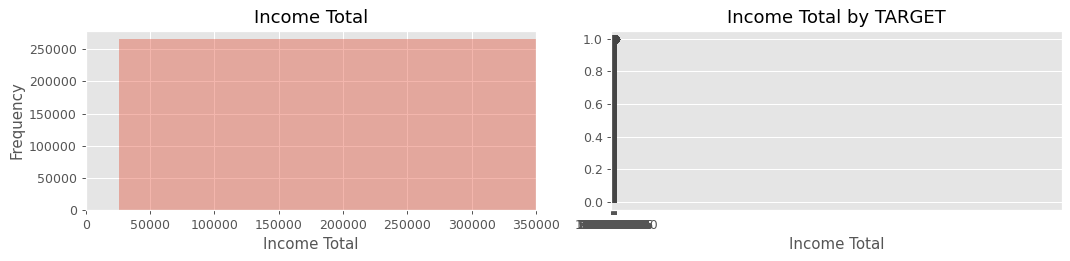

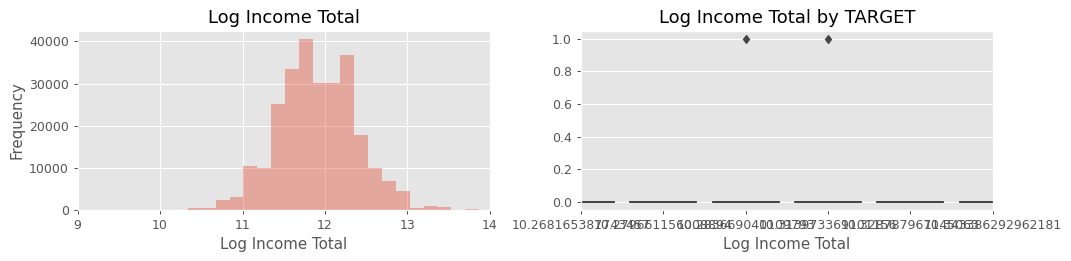

In [35]:
print(df.groupby('TARGET')['AMT_INCOME_TOTAL'].describe())
plot_var('AMT_INCOME_TOTAL', 'Income Total', continuous=True, df=df,
         x1limit=True, x2limit=True, x1l=-1, x1u=350000, x2l=-1, x2u=200000)

# Because the plot is right skewed we take a log transform of the income total
df['log_income_total'] = df['AMT_INCOME_TOTAL'].apply(lambda x: np.log(x + 1))
df.drop('AMT_INCOME_TOTAL', axis=1, inplace=True)
print(df.groupby('TARGET')['log_income_total'].describe())
plot_var('log_income_total', 'Log Income Total', continuous=True, df=df,
         x1limit=True, x2limit=True, x1l=9, x1u=14, x2l=9, x2u=14)

### Bivariate plotting

In [36]:
def BivariateAnalysisPlot(segment_by):
    """A funtion to analyze the impact of features on the target variable"""
    fig, ax = plt.subplots(ncols=1,figsize = (10, 8))
    
    # Boxplot
    sns.boxplot(x='TARGET', y=segment_by, data=df)
    plt.title('Box plot of '+segment_by)
  
    plt.show()

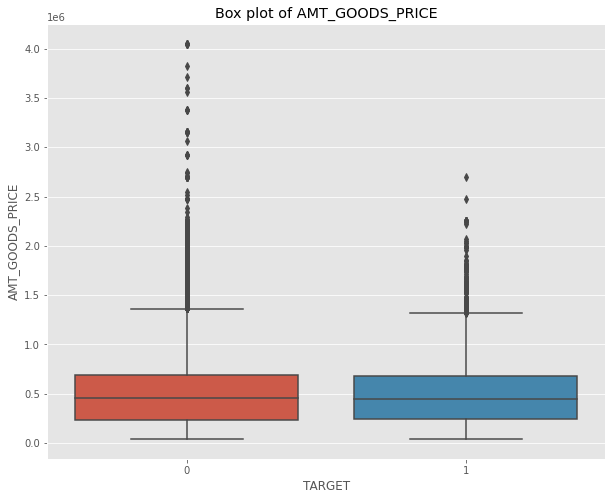

In [37]:
BivariateAnalysisPlot('AMT_GOODS_PRICE')

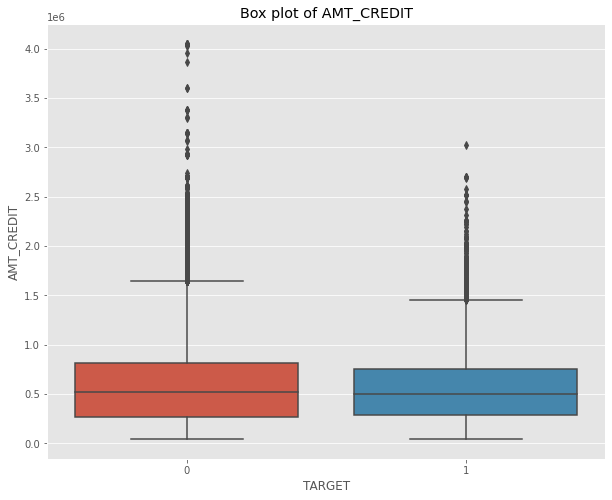

In [38]:
BivariateAnalysisPlot('AMT_CREDIT')

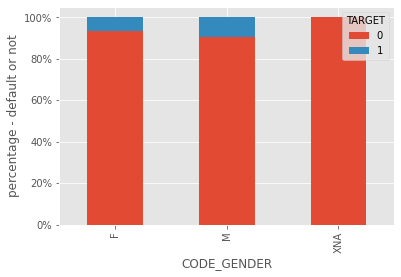

In [39]:
df.groupby(['CODE_GENDER', 'TARGET'])['TARGET'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('percentage - default or not')
plt.show()

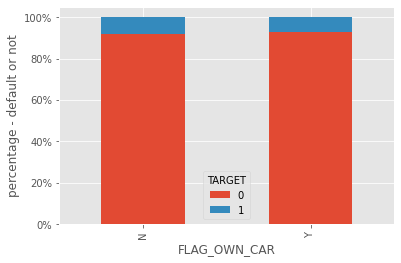

In [40]:
df.groupby(['FLAG_OWN_CAR', 'TARGET'])['TARGET'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('percentage - default or not')
plt.show()

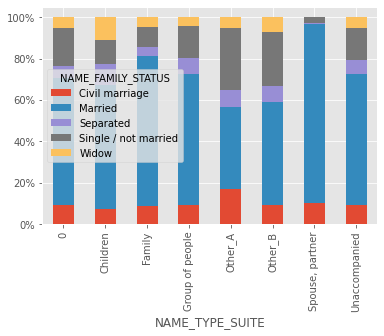

In [41]:
df.groupby(['NAME_TYPE_SUITE', 'NAME_FAMILY_STATUS'])['NAME_FAMILY_STATUS'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Create dummy variables for all categorical variables

In [42]:
# remove Xs , NAME_CONTRACT_TYPE and ORGANIZATION_TYPE
df_train = pd.get_dummies(df, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 
                                     'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 
                                     'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                                     'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'], drop_first=True)

# Standard processing and Training/Test set Split

In [43]:
X = df_train.loc[:, df_train.columns != 'TARGET'] # Feature matrix excl Target variable
y = df_train.loc[:, 'TARGET'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Model Evaluation

### Draft Modeling: Random Forest

In [44]:
rf = ensemble.RandomForestClassifier(n_estimators=200, criterion='gini',
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0,
                                     max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     bootstrap=True,
                                     oob_score=False,
                                     n_jobs=1,
                                     random_state=None,
                                     verbose=0,
                                     warm_start=False,
                                     class_weight=None
                                     )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73613
           1       0.14      0.00      0.00      6061

    accuracy                           0.92     79674
   macro avg       0.53      0.50      0.48     79674
weighted avg       0.86      0.92      0.89     79674



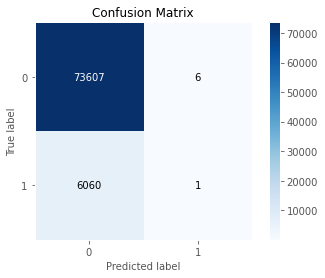

In [46]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [47]:
fi = rf.feature_importances_

In [48]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols, 'importance': rf.feature_importances_}
)

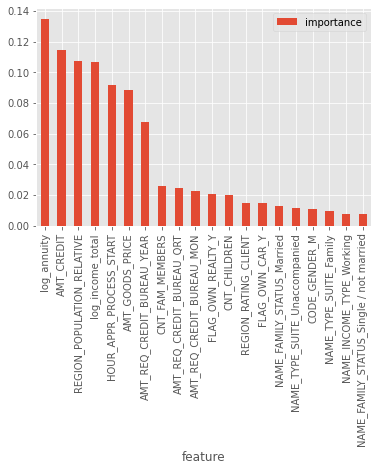

In [49]:
importance = pd.DataFrame(
    {'feature': feature_cols[:], 'importance': rf.feature_importances_[:]}
)

importance.sort_values(by='importance', axis=0,
                       ascending=False,
                       inplace=True,
                       kind='quicksort',
                       na_position='last'
                       )

importance[:20].plot(x='feature', y='importance', kind='bar')

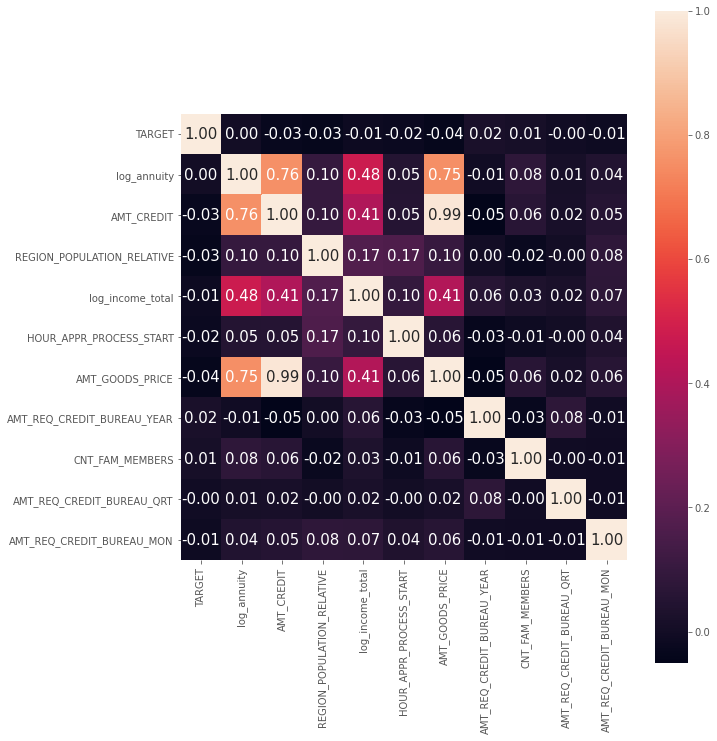

In [50]:
# Plot heatmap
cols = list(importance.feature[:10])
cols.insert(0, 'TARGET')
corrcoef_map = np.corrcoef(df_train[cols].values.T)
fig, ax = plt.subplots(figsize=(10, 12))  # Sample figsize in inches
hm = sns.heatmap(corrcoef_map, cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax
                 )

# Create X, y train, test set split 

In [51]:
X = df_train.loc[:, df_train.columns != 'TARGET'] # Feature matrix excl Target variable
y = df_train.loc[:, 'TARGET'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Modeling Random Forest

In [52]:
rf = ensemble.RandomForestClassifier(n_estimators=800, criterion='gini',
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0,
                                     max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     bootstrap=True,
                                     oob_score=False,
                                     n_jobs=1,
                                     random_state=None,
                                     verbose=0,
                                     warm_start=False,
                                     class_weight=None
                                     )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73458
           1       0.33      0.00      0.00      6216

    accuracy                           0.92     79674
   macro avg       0.63      0.50      0.48     79674
weighted avg       0.88      0.92      0.88     79674



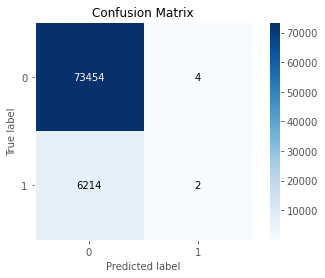

In [54]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [55]:
fi = rf.feature_importances_

In [56]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols, 'importance': rf.feature_importances_}
)

Text(0, 0.5, 'importance')

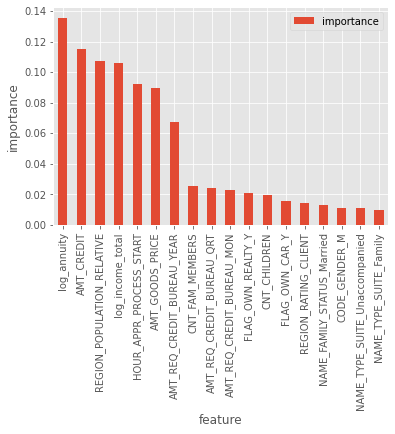

In [57]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols[:], 'importance': rf.feature_importances_[:]}
)

importance.sort_values(by='importance', axis=0,
                       ascending=False,
                       inplace=True,
                       kind='quicksort',
                       na_position='last'
                       )

importance[:18].plot(x='feature', y='importance', kind='bar')
plt.ylabel('importance')

### Decision tree

In [58]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=5,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,
                                  max_features=None,
                                  random_state=None,
                                  max_leaf_nodes=None,
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None,
                                  class_weight=None,
                                  presort=False
                                  )

model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73458
           1       0.00      0.00      0.00      6216

    accuracy                           0.92     79674
   macro avg       0.46      0.50      0.48     79674
weighted avg       0.85      0.92      0.88     79674



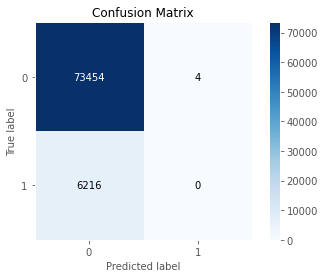

In [60]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

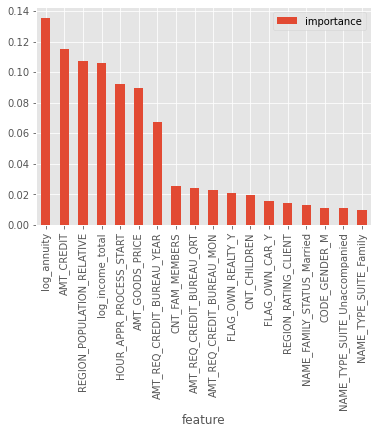

In [61]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols[:], 'importance': rf.feature_importances_[:]}
)

importance.sort_values(by='importance', axis=0, 
                       ascending=False,
                       inplace=True,
                       kind='quicksort',
                       na_position='last'
                       )

importance[:18].plot(x='feature', y='importance', kind='bar')

### Gradient Boosting Classifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,
                                 n_estimators=200,
                                 subsample=1.0,
                                 criterion='friedman_mse',
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_depth=3,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None,
                                 init=None,
                                 random_state=None,
                                 max_features=None
                                 )

model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73458
           1       0.25      0.00      0.00      6216

    accuracy                           0.92     79674
   macro avg       0.59      0.50      0.48     79674
weighted avg       0.87      0.92      0.88     79674



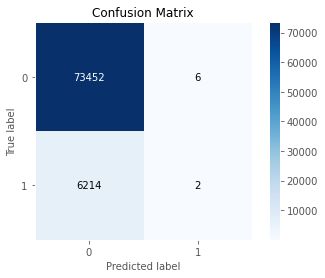

In [64]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

### Feature Scaling for SVM and Logistic Regression

In [65]:
# Standard processing
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Logistic Regression

In [67]:
lr = LogisticRegression(penalty='l2', C=1).fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73394
           1       0.00      0.00      0.00      6280

    accuracy                           0.92     79674
   macro avg       0.46      0.50      0.48     79674
weighted avg       0.85      0.92      0.88     79674



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


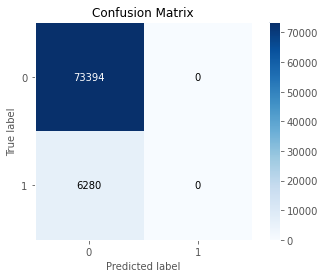

In [69]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [70]:
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.PRGn, alpha=0.6)
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, alpha=0.6)

In [71]:
X = df_train[['AMT_CREDIT', 'AMT_GOODS_PRICE']]
y = df_train['TARGET']

In [74]:
rf = ensemble.RandomForestClassifier(n_estimators=500, criterion='gini',
                                     max_depth=4,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0,
                                     max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     bootstrap=True,
                                     oob_score=False,
                                     n_jobs=1,
                                     random_state=None,
                                     verbose=0,
                                     warm_start=False,
                                     class_weight=None
                                     )

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
f1 = f1_score(y_pred, y_test)
f1

0.0

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     61244
           1       0.00      0.00      0.00      5151

    accuracy                           0.92     66395
   macro avg       0.46      0.50      0.48     66395
weighted avg       0.85      0.92      0.89     66395



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


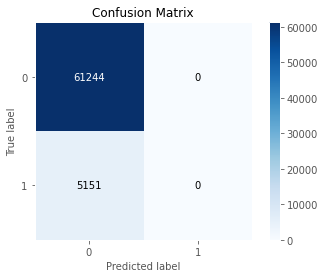

In [76]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

Text(0, 0.5, 'AMT_GOODS_PRICE')

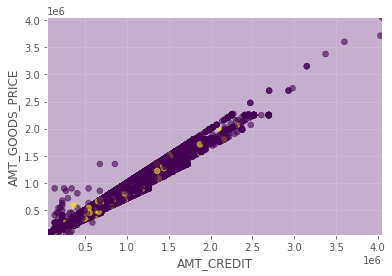

In [77]:
plot_decision_boundary(model, X_test, y_test)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')

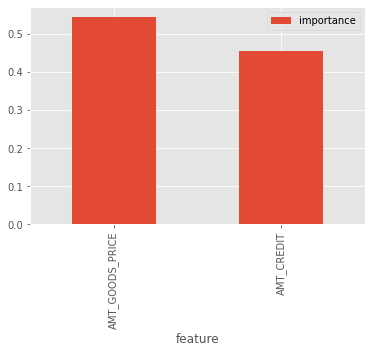

In [78]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols[:], 'importance': rf.feature_importances_[:]}
)

importance.sort_values(by='importance', axis=0,
                       ascending=False,
                       inplace=True,
                       kind='quicksort',
                       na_position='last'
                       )

importance[:18].plot(x='feature', y='importance', kind='bar')